In [21]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#Begin scraping data to form our dataset
url = 'https://www.pro-football-reference.com/years/2020/passing.htm'
html = urlopen(url)
statistics = BeautifulSoup(html)

In [23]:
# Luckily our data is formatted very nicely in a table already so we need
# to grab all rows (tr) and columns (td)
#
# First however, we need to grab the table headers so we can name our 
# DataFrame columns accordingly 
column_headers = statistics.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll('th')]

In [24]:
print(column_headers)

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC', 'GWD']


In [25]:
# Now we will collect all table rows (tr) and store them in an array. We
# will then go through each row and collect text in each col for the 
# respective row ( Row = Daniel Jones, move col byy col and collect data)
# start at 1 bc 0 is labels col header
rows = statistics.findAll('tr')[1:]

qb_stats = []
for i in range(len(rows)): 
    qb_stats.append([col.getText() for col in rows[i].findAll('td')])

In [26]:
print(qb_stats[0])

['Matt Ryan', 'ATL', '35', 'QB', '16', '16', '4-12-0', '407', '626', '65.0', '4581', '26', '4.2', '11', '1.8', '242', '63', '7.3', '7.4', '11.3', '286.3', '93.3', '66.9', '41', '257', '6.48', '6.52', '6.1', '', '']


In [27]:
#Now we have rows and columns and we can construct our DataFrame
data = pd.DataFrame(qb_stats, columns = column_headers[1:])

In [28]:
data.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,Matt Ryan,ATL,35,QB,16,16,4-12-0,407,626,65.0,...,286.3,93.3,66.9,41,257,6.48,6.52,6.1,,
1,Tom Brady,TAM,43,QB,16,16,11-5-0,401,610,65.7,...,289.6,102.2,72.6,21,143,7.12,7.53,3.3,3,3
2,Ben Roethlisberger,PIT,38,QB,15,15,12-3-0,399,608,65.6,...,253.5,94.1,60.1,13,118,5.93,6.27,2.1,4,4
3,Justin Herbert,LAC,22,QB,15,15,6-9-0,396,595,66.6,...,289.1,98.3,69.6,32,218,6.57,6.84,5.1,1,3
4,Patrick Mahomes *,KAN,25,QB,15,15,14-1-0,390,588,66.3,...,316.0,108.2,82.9,22,147,7.53,8.33,3.6,3,3


In [29]:
data.columns 

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [30]:
#We see there is two cols named 'YDS' one referring to sack loss yds
new_columns = data.columns.values 
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

In [31]:
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'NY/A', 'ANY/A', 'Sk%', '4QC',
       'GWD'],
      dtype='object')

In [32]:
# For the radar chart we want to use 6 data points to compare the QBS's 
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']

In [33]:
# Make a new DataFrame with data only for charts
radar_data = data[['Player', 'Tm'] + categories]
radar_data.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Matt Ryan,ATL,65.0,4581,26,11,7.3,93.3
1,Tom Brady,TAM,65.7,4633,40,12,7.6,102.2
2,Ben Roethlisberger,PIT,65.6,3803,33,10,6.3,94.1
3,Justin Herbert,LAC,66.6,4336,31,10,7.3,98.3
4,Patrick Mahomes *,KAN,66.3,4740,38,6,8.1,108.2


In [34]:
radar_data.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

In [35]:
#We cannot manipulate objects so must turn them to numbers 
import warnings
warnings.filterwarnings('ignore')
# to supress warning for to_numeric and other issues with copying DF
for i in categories: 
    radar_data[i] = pd.to_numeric(data[i])

In [36]:
radar_data.dtypes

Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

In [37]:
# Now all data is able to be worked with, the last change is to remove 
# symbols the site uses to (* or +) to indicate Pro Bowl or All Pro next 
# to players names 
radar_data['Player'] = radar_data['Player'].str.replace('*', '')
radar_data['Player'] = radar_data['Player'].str.replace('+', '')

In [38]:
# We want only qbs with 1500 passing yards 
radar_data_filtered = radar_data[radar_data['Yds'] > 1500]

In [39]:
# We want statistical rank by percentile which only makes sense for 
# performances to be comparative 
for i in categories: 
    radar_data_filtered[i + '_Rank'] = radar_data_filtered[i].rank(pct = True)

# Above creates new cols'TD_Rank' etc, but it must be inverted for interceptions
radar_data_filtered['Int_Rank'] = 1 - radar_data_filtered['Int_Rank']

In [40]:
radar_data_filtered.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Rank,Yds_Rank,TD_Rank,Int_Rank,Y/A_Rank,Rate_Rank
0,Matt Ryan,ATL,65.0,4581.0,26.0,11.0,7.3,93.3,0.342857,0.914286,0.628571,0.271429,0.500000,0.400000
1,Tom Brady,TAM,65.7,4633.0,40.0,12.0,7.6,102.2,0.457143,0.942857,0.957143,0.171429,0.671429,0.771429
2,Ben Roethlisberger,PIT,65.6,3803.0,33.0,10.0,6.3,94.1,0.428571,0.571429,0.800000,0.414286,0.142857,0.457143
3,Justin Herbert,LAC,66.6,4336.0,31.0,10.0,7.3,98.3,0.571429,0.857143,0.742857,0.414286,0.500000,0.657143
4,Patrick Mahomes,KAN,66.3,4740.0,38.0,6.0,8.1,108.2,0.542857,0.971429,0.914286,0.814286,0.885714,0.942857


In [66]:
#Begin to make the radar charts 
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15

# For team colors I used { https://teamcolorcodes.com/nfl-team-color-codes/ }
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d', 'CAR':'#0085ca', 'CHI':'#0b162a', 
               'CIN':'#fb4f14', 'CLE':'#311d00', 'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731', 
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837', 'LAC':'#002a5e', 'LAR':'#003594', 
               'MIA':'#008e97', 'MIN':'#4f2683', 'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740', 
               'LVR':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000', 'SEA':'#002244', 'TAM':'#d50a0a', 
               'TEN':'#0c2340', 'WAS':'#773141'}

In [42]:
# Since we have 6 categories, we want data to be every 60 degrees 2pi/6 radians
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset 

# offset moves first term to pi/6 instead 0 

In [51]:
# In order to plot data, we made 7 points so first and last same, closing circle
# player_data will represent a row of player specific data
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [62]:
# Function to get QB data
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

# NFC

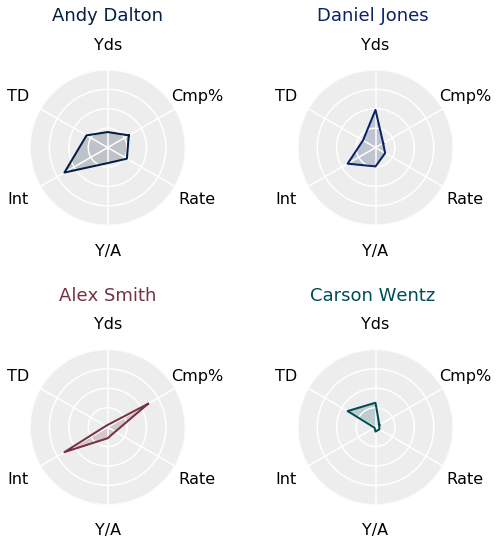

In [54]:
#NFC EAST
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dal_data = get_qb_data(radar_data_filtered, 'DAL')
nyg_data = get_qb_data(radar_data_filtered, 'NYG')
was_data = get_qb_data(radar_data_filtered, 'WAS')
phi_data = get_qb_data(radar_data_filtered, 'PHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, dal_data, team_colors['DAL'])
ax2 = create_radar_chart(ax2, angles, nyg_data, team_colors['NYG'])
ax3 = create_radar_chart(ax3, angles, was_data, team_colors['WAS'])
ax4 = create_radar_chart(ax4, angles, phi_data, team_colors['PHI'])

plt.show()

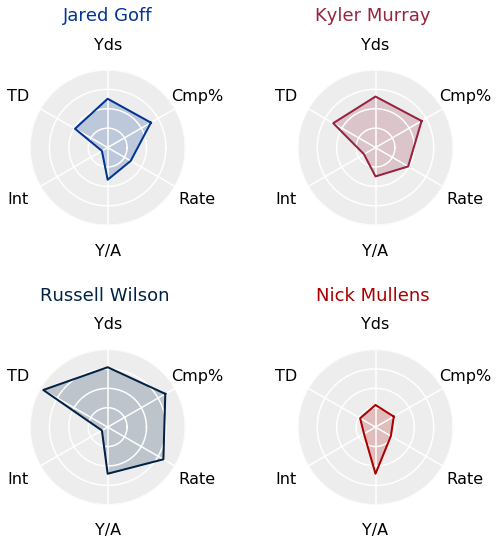

In [56]:
#NFC WEST 
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
sf_data = get_qb_data(radar_data_filtered, 'SFO')
sea_data = get_qb_data(radar_data_filtered, 'SEA')
ari_data = get_qb_data(radar_data_filtered, 'ARI')
lar_data = get_qb_data(radar_data_filtered, 'LAR')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lar_data, team_colors['LAR'])
ax2 = create_radar_chart(ax2, angles, ari_data, team_colors['ARI'])
ax3 = create_radar_chart(ax3, angles, sea_data, team_colors['SEA'])
ax4 = create_radar_chart(ax4, angles, sf_data, team_colors['SFO'])

plt.show()

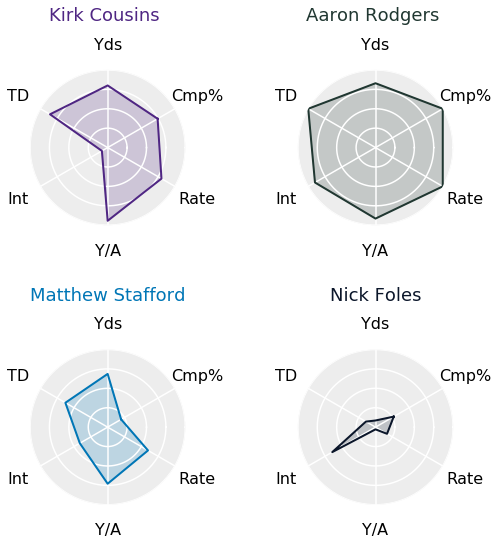

In [57]:
#NFC North 
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
min_data = get_qb_data(radar_data_filtered, 'MIN')
gnb_data = get_qb_data(radar_data_filtered, 'GNB')
det_data = get_qb_data(radar_data_filtered, 'DET')
chi_data = get_qb_data(radar_data_filtered, 'CHI')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, min_data, team_colors['MIN'])
ax2 = create_radar_chart(ax2, angles, gnb_data, team_colors['GNB'])
ax3 = create_radar_chart(ax3, angles, det_data, team_colors['DET'])
ax4 = create_radar_chart(ax4, angles, chi_data, team_colors['CHI'])

plt.show()

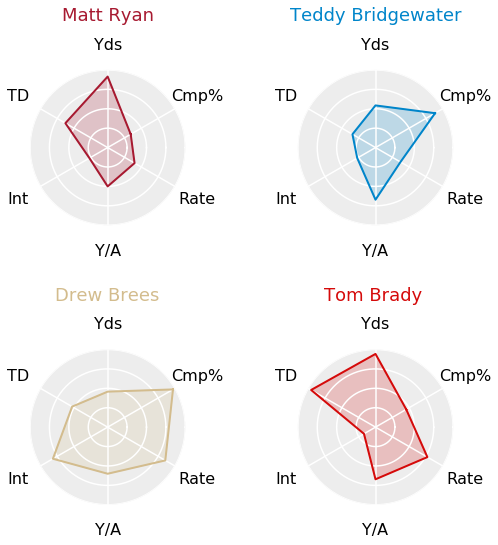

In [58]:
# NFC South
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
atl_data = get_qb_data(radar_data_filtered, 'ATL')
car_data = get_qb_data(radar_data_filtered, 'CAR')
nor_data = get_qb_data(radar_data_filtered, 'NOR')
tam_data = get_qb_data(radar_data_filtered, 'TAM')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, atl_data, team_colors['ATL'])
ax2 = create_radar_chart(ax2, angles, car_data, team_colors['CAR'])
ax3 = create_radar_chart(ax3, angles, nor_data, team_colors['NOR'])
ax4 = create_radar_chart(ax4, angles, tam_data, team_colors['TAM'])

plt.show()

# AFC

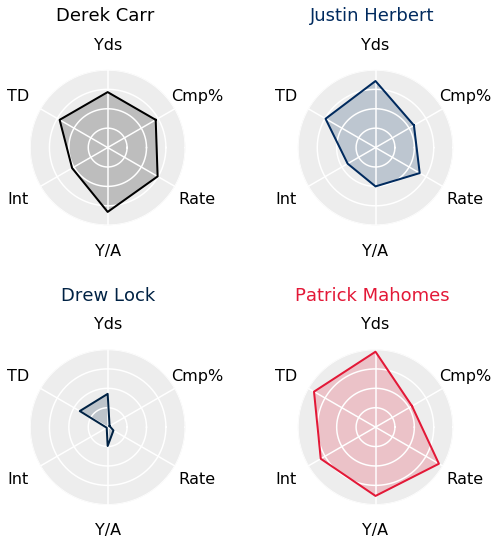

In [68]:
# AFC West
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
lvr_data = get_qb_data(radar_data_filtered, 'LVR')
lac_data = get_qb_data(radar_data_filtered, 'LAC')
den_data = get_qb_data(radar_data_filtered, 'DEN')
kan_data = get_qb_data(radar_data_filtered, 'KAN')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, lvr_data, team_colors['LVR'])
ax2 = create_radar_chart(ax2, angles, lac_data, team_colors['LAC'])
ax3 = create_radar_chart(ax3, angles, den_data, team_colors['DEN'])
ax4 = create_radar_chart(ax4, angles, kan_data, team_colors['KAN'])

plt.show()

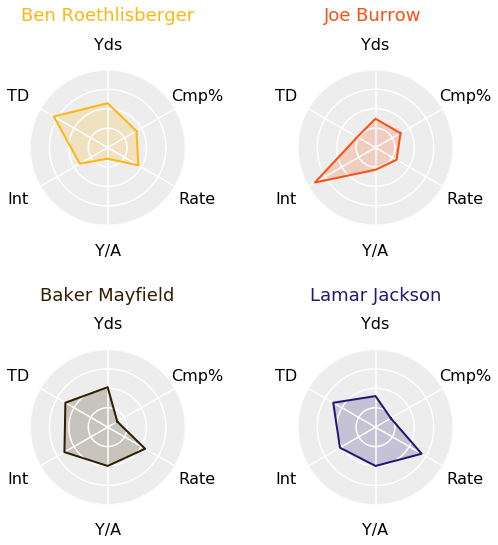

In [69]:
# AFC North
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
pit_data = get_qb_data(radar_data_filtered, 'PIT')
cin_data = get_qb_data(radar_data_filtered, 'CIN')
cle_data = get_qb_data(radar_data_filtered, 'CLE')
bal_data = get_qb_data(radar_data_filtered, 'BAL')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, pit_data, team_colors['PIT'])
ax2 = create_radar_chart(ax2, angles, cin_data, team_colors['CIN'])
ax3 = create_radar_chart(ax3, angles, cle_data, team_colors['CLE'])
ax4 = create_radar_chart(ax4, angles, bal_data, team_colors['BAL'])

plt.show()


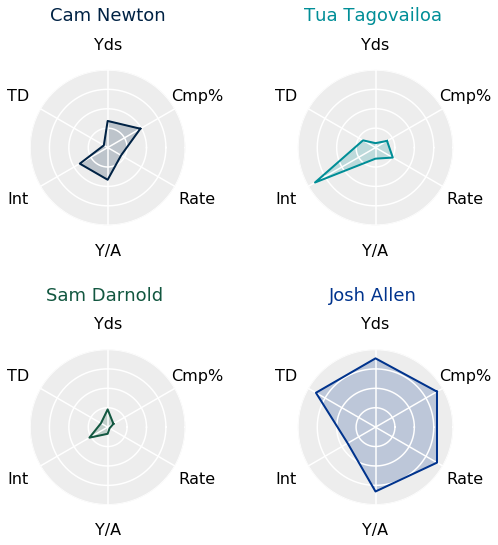

In [71]:
# AFC East
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
nwe_data = get_qb_data(radar_data_filtered, 'NWE')
mia_data = get_qb_data(radar_data_filtered, 'MIA')
nyj_data = get_qb_data(radar_data_filtered, 'NYJ')
buf_data = get_qb_data(radar_data_filtered, 'BUF')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, nwe_data, team_colors['NWE'])
ax2 = create_radar_chart(ax2, angles, mia_data, team_colors['MIA'])
ax3 = create_radar_chart(ax3, angles, nyj_data, team_colors['NYJ'])
ax4 = create_radar_chart(ax4, angles, buf_data, team_colors['BUF'])

plt.show()


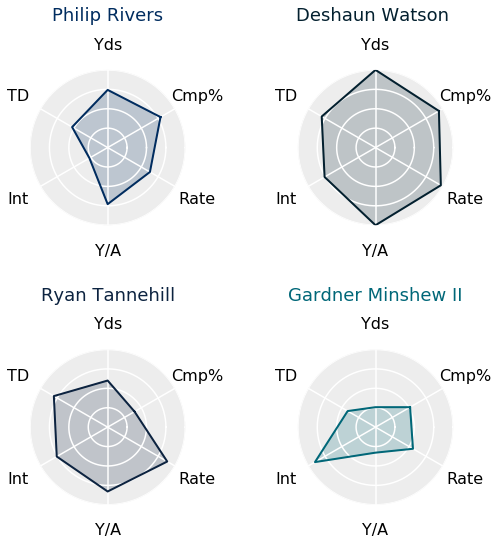

In [72]:
# AFC South
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
ind_data = get_qb_data(radar_data_filtered, 'IND')
hou_data = get_qb_data(radar_data_filtered, 'HOU')
ten_data = get_qb_data(radar_data_filtered, 'TEN')
jax_data = get_qb_data(radar_data_filtered, 'JAX')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, ind_data, team_colors['IND'])
ax2 = create_radar_chart(ax2, angles, hou_data, team_colors['HOU'])
ax3 = create_radar_chart(ax3, angles, ten_data, team_colors['TEN'])
ax4 = create_radar_chart(ax4, angles, jax_data, team_colors['JAX'])

plt.show()